ChEn-3170: Computational Methods in Chemical Engineering Fall 2018 UMass Lowell; Prof. V. F. de Almeida **19Nov2018**

# 19. Non-Linear Equation Root Finding w/ Newton's Method
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\abs}[1]{\left\lvert{#1}\right\rvert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Introduction](#intro)
* [Algorithm](#algo)
* [Input Data 1](#data1)
 - [Plot Root Function 1](#prf1)
 - [Plot Root 1](#prf11)
 - [Plot Root 2](#prf12)
* [Input Data 2](#data2)
 - [Plot Root Function 2](#prf2)
 - [Plot Root 1](#prf21)
---

## Introduction<a id="intro"></a>
Newton's method for computing roots of a single non-linear equation, $f(x)=0$, is described [here](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EpSJc_i2uXtEmSfTsZpdRfwBSYvIcr21wCnBs9XT06SdHw?e=p3QSG6). 

## Algorithm<a id="algo"></a>

Given $f(\cdot)$, find the roots 

\begin{equation*}
f(x) = 0 ,
\end{equation*}

using an iterative method based on the initial guess $x_0$. Compute the updates

\begin{equation*}
\delta x_k = - \frac{f(x_{k-1})}{f'(x_{k-1})} \ \qquad \  \forall \ \qquad \ k = 1,\ldots,k_\text{max} , 
\end{equation*}

then compute the approximation to the root

\begin{equation*}
 x_k = x_{k-1} + \delta x_k \ \qquad \  \forall \ \qquad\ \ k = 1,\ldots,k_\text{max} ,
\end{equation*}

until $\abs{x_k} \le 10^{-8}$ and $\abs{f(x_k)} \le 10^{-8}$ or $k>k_\text{max}$. 

## Input Data 1<a id="data1"></a>

Reversible reaction: A + B <=> C 

Name                        | Parameter    | Value                | Unit              |
----------------------------|--------------|----------------------|-------------------| 
initial mole fraction of A  | $x_{A0}$     | 0.5                   |               | 
initial mole fraction of B  | $x_{B0}$     | 0.5                  | | 
initial mole fraction of C  | $x_{C0}$     | 0.0                  | | 
mole equilibrium constant   | $K_\text{x}$ | 180                  |              | 

In [16]:
'''Parameters for chemical equilibrium of A + B <-> C'''

x_a_0     = 0.5
x_b_0     = 0.5
x_c_0     = 0.0
assert abs(x_a_0 + x_b_0 + x_c_0 - 1.0) <= 1e-12
assert (x_a_0 * x_b_0 * x_c_0 >= 0)

eq_kx_cte = 108.0

In [17]:
'''Root function'''

def root_function( ext_hat, x_a_0, x_b_0, x_c_0, eq_kx_cte ):
    '''
    Root function f(ext_hat) for A + B <=> C.

    Parameters
    ----------
    ext_hat: float or numpy.ndarray, required
        Normalized extent of reaction
    x_a_0: float, required
        Mole fraction of species A.
    x_b_0: float, required
        Mole fraction of species B.
    x_c_0: float, required
        Mole fraction of species B
    eq_kx_cte: float, required
        Mole equilibrium reaction constant.
    
    Returns
    -------
    value: float or numpy.ndarray
        Value or values of the root function evaluated at `ext_hat`.

    Examples
    --------
    '''
    assert (x_a_0 * x_b_0 * x_c_0 >= 0)
    assert abs(x_a_0 + x_b_0 + x_c_0 - 1.0) <= 1e-12
           
    value = (eq_kx_cte+1)*ext_hat**2 - (1-x_c_0)*(eq_kx_cte+1)*ext_hat + x_a_0 * x_b_0 * eq_kx_cte - x_c_0
        
    return value

In [18]:
'''Function: plot root function'''

def plot_function( e_min, e_max, n_pts,
                   x_a_0, x_b_0, x_c_0, eq_kx_cte,
                   ext_hat_root=None  ):
    
    import matplotlib.pyplot as plt
    plt.figure(1, figsize=(7, 7))
    import numpy as np
    e_vec = np.linspace(e_min, e_max, n_pts)
    plt.plot(e_vec, root_function(e_vec, x_a_0, x_b_0, x_c_0, eq_kx_cte),'b-',label='root_function')
    
    plt.xlabel(r'$\hat{\epsilon}$',fontsize=18)
    plt.ylabel(r'$f(\hat{\epsilon})$',fontsize=18)
    plt.title('Computing the Roots of $f(x)$',fontsize=20)
    plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    if ext_hat_root is not None:
        
        plt.plot(ext_hat_root, 0.0,'r*',label='root')
               
        (x_min,x_max) = plt.xlim()
        dx = abs(x_max-x_min)
        x_text = ext_hat_root + dx*0.01
    
        (y_min,y_max) = plt.ylim()
        dy = abs(y_max-y_min)
        y_text = 0.0 + dy*0.01
    
        plt.text(x_text, y_text, r'$\hat{\epsilon}^*=$%8.2e'%ext_hat_root,fontsize=16)
    
    
    plt.grid(True)
    plt.show()
    print('')
    
    return

### Plot Root Function 1<a id="prf1"></a>

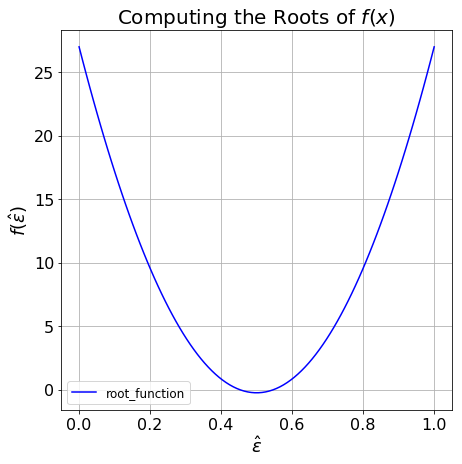

In [19]:
'''Plot root function'''

ext_hat_min = 0.0
ext_hat_max = 1.0
n_pts = 100
plot_function( ext_hat_min, ext_hat_max, n_pts, x_a_0, x_b_0, x_c_0, eq_kx_cte )

In [20]:
'''Root function derivative'''

def root_function_prime( ext_hat, x_c_0, eq_kx_cte ):
    '''
    Derivative of root function f'(ext_hat) for A + B <=> C.

    Parameters
    ----------
    ext_hat: float or numpy.ndarray, required
        Normalized extent of reaction
    x_c_0: float, required
        Mole fraction of species B
    eq_kx_cte: float, required
        Mole equilibrium reaction constant.
    
    Returns
    -------
    value: float or numpy.ndarray
        Value or values of the root function evaluated at `ext_hat`.

    Examples
    --------
    '''
    # value = (eq_kx_cte+1)*ext_hat**2 - (1-x_c_0)*(eq_kx_cte+1)*ext_hat + x_a_0 * x_b_0 * eq_kx_cte - x_c_0       
    value = 2.0*(eq_kx_cte+1)*ext_hat - (1-x_c_0)*(eq_kx_cte+1)
        
    return value

In [21]:
"""Newton's method"""

def newton_solve( ext_hat_0=0.0, k_max=30, tolerance=1.0e-10):
    # Newton's method loop

    # Other initialization
    delta   = 1e+10
    f_root  = 1e+10
    ext_hat = ext_hat_0

    print('\n')
    print('************************************************')
    print("          Newton's Method Iterations            ")
    print('************************************************')
    print("k |  f(e_k)  |  f'(e_k) | |del e_k| |    e_k   |")
    print('------------------------------------------------')

    k = 0
    
    while (abs(delta) > 1.0e-08 or abs(f_root) > 1.0e-08) and k <= k_max:
        f_root = root_function(ext_hat, x_a_0, x_b_0, x_c_0, eq_kx_cte)
        f_root_prime = root_function_prime( ext_hat, x_c_0, eq_kx_cte )
        delta = -f_root / f_root_prime
        ext_hat = ext_hat + delta
        k = k + 1
        print('%2i %+5.3e %+5.3e %+5.3e  %+5.3e'%(k,f_root,f_root_prime,abs(delta),ext_hat))

    print('************************************************')
    
    print('Root = %8.5e'%ext_hat)
    
    return ext_hat

In [22]:
'''Find root and equilibrium molar fractions'''

ext_hat_0 = 0.0
k_max = 20
tolerance = 1.0e-8

ext_hat = newton_solve(ext_hat_0,k_max,tolerance)

x_a = (x_a_0 - ext_hat)/(1.0-ext_hat)
x_b = (x_b_0 - ext_hat)/(1.0-ext_hat)
x_c = (x_c_0 + ext_hat)/(1.0-ext_hat)

assert x_a * x_b * x_c >= 0
assert abs(x_a + x_b + x_c - 1.0) <= 1e-12

print('')
print('Equilibrium mole fractions:\n')
print('x_a = %5.3e\n'%x_a)
print('x_b = %5.3e\n'%x_a)
print('x_c = %5.3e\n'%x_c)



************************************************
          Newton's Method Iterations            
************************************************
k |  f(e_k)  |  f'(e_k) | |del e_k| |    e_k   |
------------------------------------------------
 1 +2.700e+01 -1.090e+02 +2.477e-01  +2.477e-01
 2 +6.688e+00 -5.500e+01 +1.216e-01  +3.693e-01
 3 +1.612e+00 -2.849e+01 +5.657e-02  +4.259e-01
 4 +3.488e-01 -1.616e+01 +2.159e-02  +4.475e-01
 5 +5.080e-02 -1.145e+01 +4.436e-03  +4.519e-01
 6 +2.145e-03 -1.048e+01 +2.046e-04  +4.521e-01
 7 +4.561e-06 -1.044e+01 +4.369e-07  +4.521e-01
 8 +2.081e-11 -1.044e+01 +1.993e-12  +4.521e-01
************************************************
Root = 4.52109e-01

Equilibrium mole fractions:

x_a = 8.741e-02

x_b = 8.741e-02

x_c = 8.252e-01



### Plot Root 1<a id="prf11"></a>

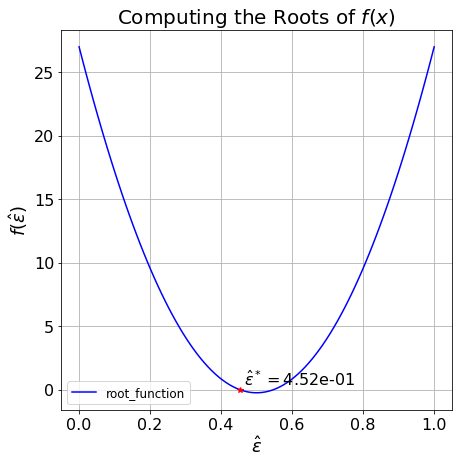

In [23]:
'''Plot root function with root'''

ext_hat_min = 0.0
ext_hat_max = 1.0
n_pts = 100
plot_function( ext_hat_min, ext_hat_max, n_pts, x_a_0, x_b_0, x_c_0, eq_kx_cte, ext_hat )

In [24]:
'''Find root and equilibrium molar fractions'''

ext_hat_0 = 0.7
k_max = 20
tolerance = 1.0e-8

ext_hat = newton_solve(ext_hat_0,k_max,tolerance)

x_a = (x_a_0 - ext_hat)/(1.0-ext_hat)
x_b = (x_b_0 - ext_hat)/(1.0-ext_hat)
x_c = (x_c_0 + ext_hat)/(1.0-ext_hat)

assert x_a * x_b * x_c >= 0
assert abs(x_a + x_b + x_c - 1.0) <= 1e-12

print('')
print('Equilibrium mole fractions:\n')
print('x_a = %5.3e\n'%x_a)
print('x_b = %5.3e\n'%x_a)
print('x_c = %5.3e\n'%x_c)



************************************************
          Newton's Method Iterations            
************************************************
k |  f(e_k)  |  f'(e_k) | |del e_k| |    e_k   |
------------------------------------------------
 1 +4.110e+00 +4.360e+01 +9.427e-02  +6.057e-01
 2 +9.686e-01 +2.305e+01 +4.202e-02  +5.637e-01
 3 +1.925e-01 +1.389e+01 +1.386e-02  +5.499e-01
 4 +2.093e-02 +1.087e+01 +1.926e-03  +5.479e-01
 5 +4.042e-04 +1.045e+01 +3.869e-05  +5.479e-01
 6 +1.631e-07 +1.044e+01 +1.563e-08  +5.479e-01
 7 +2.132e-14 +1.044e+01 +2.042e-15  +5.479e-01
************************************************
Root = 5.47891e-01

Equilibrium mole fractions:

x_a = -1.059e-01

x_b = -1.059e-01

x_c = 1.212e+00



### Plot Root 2<a id="prf12"></a>

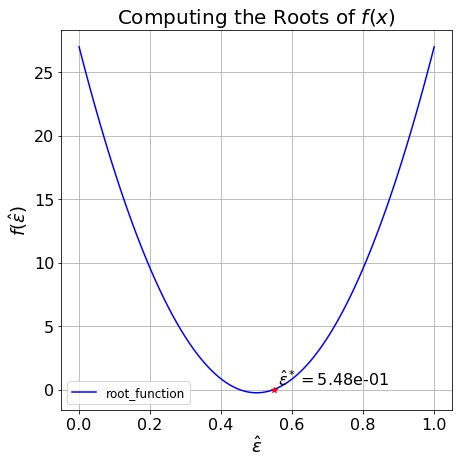

In [25]:
'''Plot root function with root'''

ext_hat_min = 0.0
ext_hat_max = 1.0
n_pts = 100
plot_function( ext_hat_min, ext_hat_max, n_pts, x_a_0, x_b_0, x_c_0, eq_kx_cte, ext_hat )

In [26]:
'''Find root'''

ext_hat_0 = ext_hat
k_max = 20
tolerance = 1.0e-8

ext_hat = newton_solve(ext_hat_0,k_max,tolerance)



************************************************
          Newton's Method Iterations            
************************************************
k |  f(e_k)  |  f'(e_k) | |del e_k| |    e_k   |
------------------------------------------------
 1 +0.000e+00 +1.044e+01 +0.000e+00  +5.479e-01
************************************************
Root = 5.47891e-01


## Input Data 2<a id="data2"></a>

Reversible reaction: A + B <=> C 

Name                        | Parameter    | Value                | Unit              |
----------------------------|--------------|----------------------|-------------------| 
initial mole fraction of A  | $x_{A0}$     | 0.5                   |               | 
initial mole fraction of B  | $x_{B0}$     | 0.2                  | | 
initial mole fraction of C  | $x_{C0}$     | 0.3                  | | 
mole equilibrium constant   | $K_\text{x}$ | 180                  |              | 

In [27]:
'''Parameters for chemical equilibrium of A + B <-> C'''

x_a_0     = 0.5
x_b_0     = 0.2
x_c_0     = 0.3
assert abs(x_a_0 + x_b_0 + x_c_0 - 1.0) <= 1e-12
assert (x_a_0 * x_b_0 * x_c_0 >= 0)

eq_kx_cte = 108.0

### Plot Root Function 2<a id="prf2"></a>

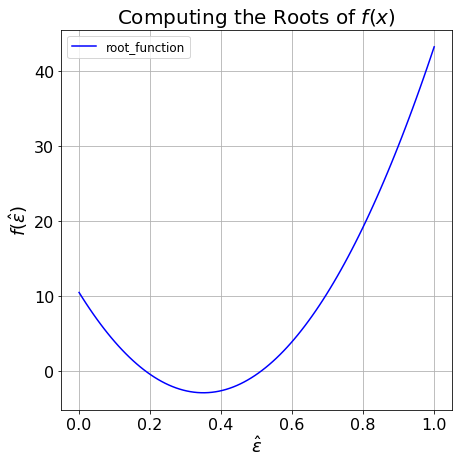

In [28]:
'''Plot root function'''

ext_hat_min = 0.0
ext_hat_max = 1.0
n_pts = 100
plot_function( ext_hat_min, ext_hat_max, n_pts, x_a_0, x_b_0, x_c_0, eq_kx_cte )

In [29]:
'''Find root and equilibrium molar fractions'''

ext_hat_0 = 0.6
k_max = 20
tolerance = 1.0e-8

ext_hat = newton_solve(ext_hat_0,k_max,tolerance)

x_a = (x_a_0 - ext_hat)/(1.0-ext_hat)
x_b = (x_b_0 - ext_hat)/(1.0-ext_hat)
x_c = (x_c_0 + ext_hat)/(1.0-ext_hat)

assert x_a * x_b * x_c >= 0
assert abs(x_a + x_b + x_c - 1.0) <= 1e-12

print('')
print('Equilibrium mole fractions:\n')
print('x_a = %5.3e\n'%x_a)
print('x_b = %5.3e\n'%x_a)
print('x_c = %5.3e\n'%x_c)



************************************************
          Newton's Method Iterations            
************************************************
k |  f(e_k)  |  f'(e_k) | |del e_k| |    e_k   |
------------------------------------------------
 1 +3.960e+00 +5.450e+01 +7.266e-02  +5.273e-01
 2 +5.755e-01 +3.866e+01 +1.489e-02  +5.125e-01
 3 +2.415e-02 +3.541e+01 +6.820e-04  +5.118e-01
 4 +5.069e-05 +3.527e+01 +1.437e-06  +5.118e-01
 5 +2.252e-10 +3.527e+01 +6.386e-12  +5.118e-01
************************************************
Root = 5.11771e-01

Equilibrium mole fractions:

x_a = -2.411e-02

x_b = -2.411e-02

x_c = 1.663e+00



### Plot Root 1<a id="prf21"></a>

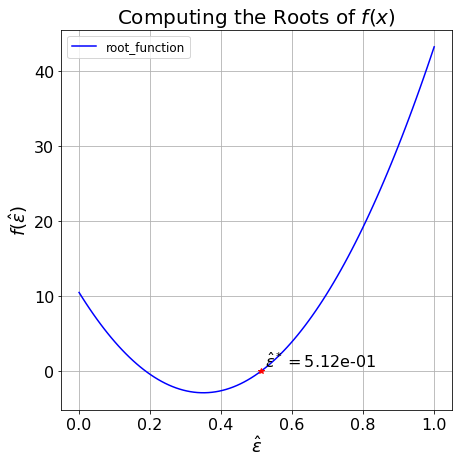

In [30]:
'''Plot root function with root'''

ext_hat_min = 0.0
ext_hat_max = 1.0
n_pts = 100
plot_function( ext_hat_min, ext_hat_max, n_pts, x_a_0, x_b_0, x_c_0, eq_kx_cte, ext_hat )